In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
#non-negative matrix factorisation technique higher to lower dimensional vector

In [38]:
doc=["This news dataset is a persistent historical archive of noteable events in the Indian subcontinent from start-2001 to mid-2020, recorded in realtime by the journalists of India. It contains approximately 3.3 million events published by Times of India.",
     "A set of words that is complete in itself, typically containing a subject and predicate, conveying a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses.",
    "What are the Augmentations that have worked for you?"]

In [39]:
# Creating sparse matrix


cv= CountVectorizer()
wordcountvector=cv.fit_transform(doc)

In [40]:
wordcountvector.shape


(3, 62)

In [41]:
wordcountvector.toarray()

array([[1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,
        1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 3, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]],
      dtype=int64)

In [42]:
cv.get_feature_names()

['2001',
 '2020',
 'and',
 'approximately',
 'archive',
 'are',
 'augmentations',
 'by',
 'clause',
 'clauses',
 'command',
 'complete',
 'consisting',
 'containing',
 'contains',
 'conveying',
 'dataset',
 'events',
 'exclamation',
 'for',
 'from',
 'have',
 'historical',
 'in',
 'india',
 'indian',
 'is',
 'it',
 'itself',
 'journalists',
 'main',
 'mid',
 'million',
 'more',
 'news',
 'noteable',
 'of',
 'one',
 'or',
 'persistent',
 'predicate',
 'published',
 'question',
 'realtime',
 'recorded',
 'set',
 'sometimes',
 'start',
 'statement',
 'subcontinent',
 'subject',
 'subordinate',
 'that',
 'the',
 'this',
 'times',
 'to',
 'typically',
 'what',
 'words',
 'worked',
 'you']

In [43]:
featurenames=cv.get_feature_names()

In [44]:
#turn frequency times inverse document frequency

tt= TfidfTransformer(smooth_idf=True,use_idf=True)
tf_idf_vector = tt.fit_transform(wordcountvector)

In [45]:
query= tf_idf_vector[1]

In [46]:
df=pd.DataFrame(query.T.todense(),index=featurenames,columns=['tfidf'])

In [47]:
df.sort_values(by=['tfidf'],ascending=False)

,tfidf
and,0.486352
or,0.324235
of,0.246589
more,0.162117
sometimes,0.162117
...,...
journalists,0.000000
2020,0.000000
million,0.000000
news,0.000000


In [48]:
df= pd.read_csv('india-news-headlines.csv', error_bad_lines= False)

In [49]:
df.head(30)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [50]:
datatext=df[['headline_text']].astype('str')
datatext.shape

(3297172, 1)

In [77]:
dt=datatext.loc[1:100000,:]

In [78]:
dt.shape

(100000, 1)

In [79]:
 import nltk

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\P
[nltk_data]     Suchith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
sw= stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [84]:
def sw_remove(x):
    t=x.split()
    t= [z for z in t if z not in sw ]
    sentence= ' '.join(t)
    return sentence

In [85]:
dt['Refinedheadlines']=dt['headline_text'].apply(lambda x:sw_remove(x))

C:\Users\P Suchith\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
dt.head()

,headline_text,Refinedheadlines
1,Status quo will not be disturbed at Ayodhya; s...,Status quo disturbed Ayodhya; says Vajpayee
2,Fissures in Hurriyat over Pak visit,Fissures Hurriyat Pak visit
3,America's unwanted heading for India?,America's unwanted heading India?
4,For bigwigs; it is destination Goa,For bigwigs; destination Goa
5,Extra buses to clear tourist traffic,Extra buses clear tourist traffic


In [87]:
def wordcount(y):
    t=y.split()
    return len(t)

In [88]:
dt['word_count']=dt['Refinedheadlines'].apply(lambda y:wordcount(y))

C:\Users\P Suchith\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
dt.head()

,headline_text,Refinedheadlines,word_count
1,Status quo will not be disturbed at Ayodhya; s...,Status quo disturbed Ayodhya; says Vajpayee,6
2,Fissures in Hurriyat over Pak visit,Fissures Hurriyat Pak visit,4
3,America's unwanted heading for India?,America's unwanted heading India?,4
4,For bigwigs; it is destination Goa,For bigwigs; destination Goa,4
5,Extra buses to clear tourist traffic,Extra buses clear tourist traffic,5


In [90]:
dt['word_count'].describe()

count    100000.000000
mean          4.751210
std           1.341384
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          16.000000
Name: word_count, dtype: float64

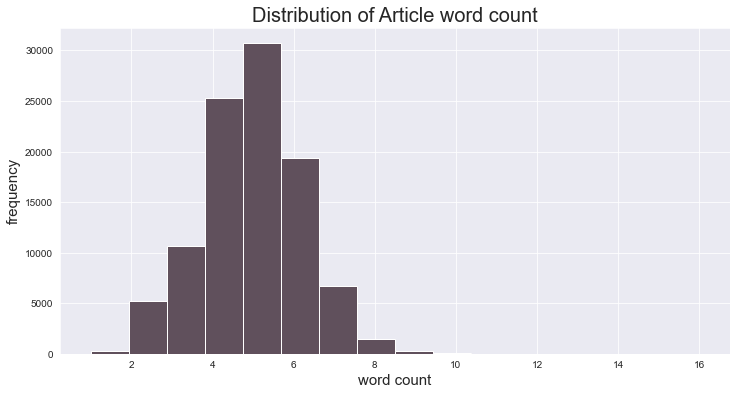

In [91]:
fig=plt.figure(figsize=(12,6))
plt.hist(dt['word_count'],bins=16,color='#60505C')
plt.title("Distribution of Article word count",fontsize=20)
plt.xlabel('word count',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()

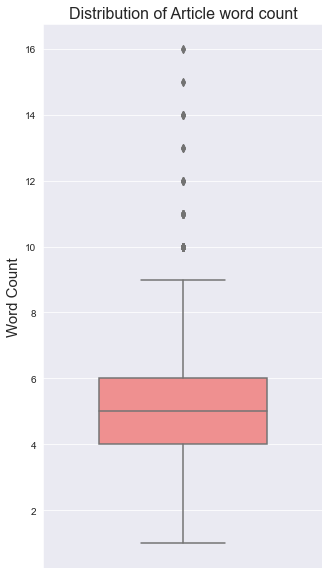

In [92]:
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(5,10))
sns.boxplot(
        dt['word_count'],
        orient='v',
        width=0.6,
        color='#ff8080'
)

plt.ylabel("Word Count",fontsize=15)
plt.title("Distribution of Article word count",fontsize=16)

plt.show()

In [94]:
headline_sentences = [''.join(text) for text in dt['Refinedheadlines']]

In [95]:
vectorizer = CountVectorizer(analyzer='word',max_features=5000)
x_counts = vectorizer.fit_transform(headline_sentences)

In [96]:
x_counts.toarray().shape

(100000, 5000)

In [97]:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [98]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 374811 stored elements in Compressed Sparse Row format>

In [100]:
num_topics = 20
model = NMF(n_components = num_topics, init='nndsvd')
model.fit(x_tfidf)

NMF(init='nndsvd', n_components=20)

In [101]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic #'+'{:02d}'.format(i+1)] = words
        
    return pd.DataFrame(word_dict)


In [103]:
get_nmf_topics(model,50)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13,Topic #14,Topic #15,Topic #16,Topic #17,Topic #18,Topic #19,Topic #20
0,the,govt,india,city,new,police,bjp,no,killed,it,meet,rs,held,us,power,day,cm,cong,case,may
1,speaking,state,pak,round,year,delhi,up,please,two,time,today,cr,man,pak,supply,life,says,polls,hc,get
2,man,staff,china,sports,chief,station,polls,yet,militants,life,pm,lakh,two,indian,state,security,state,leader,murder,go
3,art,set,talks,old,gets,chief,congress,time,road,bangalore,all,crore,murder,indo,tariff,one,centre,poll,plea,students
4,week,hc,terrorism,scan,look,firing,poll,change,kashmir,indian,begins,worth,fake,war,water,today,minister,chief,bail,water
5,world,plans,world,briefs,policy,custody,sp,up,one,back,party,000,seized,ties,hike,celebrated,pm,up,court,life
6,counsellor,asks,musharraf,water,york,traffic,gujarat,minister,injured,industry,national,net,woman,pm,cuts,strike,congress,ncp,accused,set
7,good,bihar,pakistan,up,soon,arrest,pm,takers,among,big,tomorrow,10,three,visit,cut,world,chief,leaders,gets,back
8,way,schools,air,jan,old,probe,modi,decision,four,kerala,discuss,state,leader,help,people,valentine,we,demands,sc,soon
9,life,act,visit,visit,system,attack,sena,says,mishap,com,women,plan,racket,terrorism,situation,celebrations,gujarat,mla,cbi,take


In [106]:
model.components_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.45708608e-03, 1.79258665e-03],
       [4.06662929e-03, 3.41949023e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.24153737e-03],
       [1.14082579e-02, 0.00000000e+00, 6.38770267e-03, ...,
        1.87952151e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.54682936e-05, 2.56821139e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.81693880e-04, 1.90162455e-03, 4.70347085e-03],
       [3.00247820e-02, 0.00000000e+00, 0.00000000e+00, ...,
        6.48732730e-04, 1.35910810e-02, 3.88000270e-03]])